In [88]:
import pandas as pd
# import csv
import numpy as np
import matplotlib.pyplot as plt
import gc
# from geopy.distance import vincenty as vsd
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import pickle
import os.path

data_dir = 'data/final_data/'

In [2]:
all_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'MD', 'FL',
       'GA', 'HI', 'ID', 'OR', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'PA', 'OK', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

len(all_states)

51

In [3]:
data_F = pd.read_csv(data_dir + 'data_final.csv')

D:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,6,9,34,51,52,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# data_F[['FIPST', 'LSTATE']]
states = data_F['LSTATE'].unique() # no Kansas 

print([i for i in all_states if i not in states])
print(len(states))

['KS']
50


In [5]:
# non-important information
data_cols = data_F.columns
cols1 = data_cols[0:20]
cols2 = data_cols[25:28]
data_cols_r = cols1.append(cols2)

print(data_cols_r)

Index(['SURVYEAR', 'NCESSCH', 'FIPST', 'LEAID', 'SCHNO', 'STID', 'SEASCH',
       'LEANM', 'SCHNAM', 'PHONE', 'MSTREE', 'MCITY', 'MSTATE', 'MZIP',
       'MZIP4', 'LSTREE', 'LCITY', 'LSTATE', 'LZIP', 'LZIP4', 'LONCOD',
       'CONUM', 'CONAME'],
      dtype='object')


In [6]:
idx = [51,52,54,55,56]
data_cols[idx]

Index(['TITLEISTAT', 'TITLEI', 'MAGNET', 'CHARTR', 'SHARED'], dtype='object')

In [7]:
data_F['SHARED'].unique()

array(['2', 'M', '1', 2, 1], dtype=object)

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'

data_final_T = data_F.copy()

print(data_final_T.shape)
# print(data_final_T['LSTATE'].unique())
# print([i for i in states if i not in data_final_T['LSTATE'].unique()])

# data_final_T = data_final_T[~((data_final_T['TITLEISTAT']=='M') | (data_final_T['TITLEISTAT']=='N'))]
# data_final_T = data_final_T[~((data_final_T['TITLEISTAT']=='M'))]
data_final_T['TITLEISTAT'][data_final_T['TITLEISTAT'] == 'M'] = -1
data_final_T['TITLEISTAT'][data_final_T['TITLEISTAT'] == 'N'] = 0
data_final_T['TITLEISTAT'] = pd.to_numeric(data_final_T['TITLEISTAT'])

print(data_final_T.shape)
# print(data_final_T['LSTATE'].unique())
# print([i for i in states if i not in data_final_T['LSTATE'].unique()])

data_final_T['TITLEI'][data_final_T['TITLEI']=='M'] = -1
data_final_T['TITLEI'][data_final_T['TITLEI']=='N'] = 0
data_final_T['TITLEI'] = pd.to_numeric(data_final_T['TITLEI'])

print(data_final_T.shape)
# print(data_final_T['LSTATE'].unique())
# print([i for i in states if i not in data_final_T['LSTATE'].unique()])

# data_final_T = data_final_T[~((data_final_T['MAGNET']=='M'))]
data_final_T['MAGNET'][data_final_T['MAGNET'] == 'M'] = 0
data_final_T['MAGNET'][data_final_T['MAGNET'] == 'N'] = 0
data_final_T['MAGNET'] = pd.to_numeric(data_final_T['MAGNET'])

print(data_final_T.shape)
# print(data_final_T['LSTATE'].unique())
# print([i for i in states if i not in data_final_T['LSTATE'].unique()])

data_final_T['CHARTR'][data_final_T['CHARTR'] == 'N'] = 0
data_final_T['CHARTR'] = pd.to_numeric(data_final_T['CHARTR'])

print(data_final_T.shape)
# print(data_final_T['LSTATE'].unique())
# print([i for i in states if i not in data_final_T['LSTATE'].unique()])

# data_final_T = data_final_T[~((data_final_T['SHARED']=='M'))]
data_final_T['SHARED'][data_final_T['SHARED'] == 'M'] = -1
data_final_T['SHARED'] = pd.to_numeric(data_final_T['SHARED'])

print(data_final_T.shape)
print(data_final_T['LSTATE'].unique())
print(data_final_T['LSTATE'].unique().shape)
print([i for i in states if i not in data_final_T['LSTATE'].unique()])

(68902, 446)
(68902, 446)
(68902, 446)
(68902, 446)
(68902, 446)
(68902, 446)
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH' 'NJ'
 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT'
 'VA' 'WA' 'WV' 'WI' 'WY']
(50,)
[]


In [9]:
x = data_final_T.as_matrix()
fin_cols = data_final_T.columns

In [10]:
n_idx = np.argwhere(x == 'N')

col_idx = np.unique(n_idx[:,1])

col_idx

array([ 30,  53, 308, 310, 311], dtype=int64)

In [11]:
fin_cols[col_idx]

Index(['RECONSTY', 'STITLI', 'VIRTUALSTAT', 'CHARTAUTH1', 'CHARTAUTH2'], dtype='object')

In [12]:
data_final_T['NSLPSTATUS'].unique()

array(['NSLPWOPRO', 'M', 'NSLPPRO2', 'NSLPPRO3', 'NSLPNO', 'NSLPPRO1',
       'NSLPCEO'], dtype=object)

In [13]:
data_final_T['NSLPSTATUS'].unique()

array(['NSLPWOPRO', 'M', 'NSLPPRO2', 'NSLPPRO3', 'NSLPNO', 'NSLPPRO1',
       'NSLPCEO'], dtype=object)

In [14]:
data_T = data_final_T.copy()

print(data_T.shape)

data_T = data_T.drop(['RECONSTY'], axis=1) # don't need this value most is N or 2013. Have flag for it

data_T['STITLI'][data_T['STITLI'] == 'M'] = -1 
data_T['STITLI'][data_T['STITLI'] == 'N'] = 0 
data_T['STITLI'] = pd.to_numeric(data_T['STITLI'])

data_T['VIRTUALSTAT'][data_T['VIRTUALSTAT'] == 'N'] = 0 
data_T['VIRTUALSTAT'][data_T['VIRTUALSTAT'] == 'VIRTUALNO'] = 2
data_T['VIRTUALSTAT'][data_T['VIRTUALSTAT'] == 'VIRTUALYES'] = 1

data_T = data_T.drop(['CHARTAUTH1', 'CHARTAUTH2'], axis=1)

print((data_T['NSLPSTATUS']=='M').sum())

# data_T = data_T[~((data_T['NSLPSTATUS']=='M'))]

# nslp = pd.get_dummies(data_T['NSLPSTATUS'])
# nslp_cols = nslp.columns

# data_T[nslp_cols] = nslp
# data_T = data_T.drop(['NSLPSTATUS'], axis=1)

nslp_stats = data_final_T['NSLPSTATUS'].unique()
data_T['NSLPSTATUS'] = data_T['NSLPSTATUS'].astype("category", ordered=True, categories=nslp_stats).cat.codes

print(data_T.shape)

(68902, 446)
15027
(68902, 443)


In [15]:
data_T['NSLPSTATUS'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [16]:
# datat2 = data_T.drop(data_cols_r,axis=1).copy()
datat2 = data_T.copy()
datat_copy = data_T.drop(data_cols_r,axis=1).copy()

t2cols = datat2.columns
x = datat2.as_matrix()

In [17]:
# datat_copy.drop(['avg_teacher_salary'],axis=1).isnull().values.any()
# datat_copy.isnull().values.any()

In [18]:
datat3 = datat2.copy()
print(datat3.shape)
datat3 = datat3[~(datat3['avg_teacher_salary'].isnull())]
print(datat3.shape)
datat3['avg_teacher_salary'].loc[(~np.isfinite(datat3['avg_teacher_salary'])) & datat3['avg_teacher_salary'].notnull()] = np.nan
datat3 = datat3[~(datat3['avg_teacher_salary'].isnull())]
print(datat3.shape)

(68902, 443)
(68861, 443)
(68850, 443)


In [19]:
print(datat3.shape)

data_final = datat3

print(data_final.shape)

(68850, 443)
(68850, 443)


# Some functions

In [20]:
def get_stats_array(column):
    stats = dict()
    
    stats["mean"] = np.mean(column)
    stats["std"] = np.std(column)
    stats["median"] = np.median(column)
    stats["q75"] = np.percentile(column, 75, interpolation='midpoint')
    stats["q25"] = np.percentile(column, 25, interpolation='midpoint')
#     stats["mode"] = np.mode(column)
    stats["max"] = np.max(column)
    stats["min"] = np.min(column)
    return stats

def print_stats_array(stats, name):
    print(name, "Statistics")
    print("Mean: %.2f, Standard Deviation: %.4f" %(stats["mean"], stats["std"]))
    print("Median: %.2f, 75%% Quantile: %.2f, 25%% Quantile: %.2f, IQR: %.2f" 
          %(stats["median"], stats["q75"], stats["q25"], stats["q75"] - stats["q25"]))
    print("Max: %.2f, Min: %.2f" %(stats["max"], stats["min"]))
    
def get_hist_array(data, name, stats, q=False, median=True):
    
    hist_fig = plt.figure( figsize=(5,5) , dpi=100)

    bin_size = 5
    tick_size = 10
    
    max_val = stats["max"]

    n, bins, patches = plt.hist(data, bins=[i for i in range(np.ceil(max_val).astype(int)+bin_size) if i%bin_size==0],
                               histtype='bar', ec='black', color='c')

    if median: 
        plt.axvline(stats["median"], color='b', linestyle='dashed', linewidth=2)
        if q:
            plt.axvline(stats["q25"], color='b', linestyle='dashed', linewidth=2)
            plt.axvline(stats["q75"], color='b', linestyle='dashed', linewidth=2)
    else: 
        plt.axvline(stats["mean"], color='b', linestyle='dashed', linewidth=2)
        if q:
            plt.axvline(stats["mean"] + stats["std"], color='b', linestyle='dashed', linewidth=2)
            plt.axvline(stats["mean"] - stats["std"], color='b', linestyle='dashed', linewidth=2)

    xticks = [i for i in range(np.ceil(max_val).astype(int) + tick_size) if i%tick_size==0]

    plt.xticks(xticks)

    plt.xlabel('Proficiency Level')
    plt.ylabel('Frequency')
    plt.title(name)
    plt.show()

def get_stats(column):
    
    stats = dict()
    
    stats["mean"] = column.mean()
    stats["std"] = column.std()
    stats["median"] = column.median()
    stats["q75"] = column.quantile(q=.75, interpolation='midpoint')
    stats["q25"] = column.quantile(q=.25, interpolation='midpoint')
    stats["mode"] = column.mode()
    stats["max"] = column.max()
    stats["min"] = column.min()  
    return stats

def print_stats(stats, name):
    print(name, "Statistics")
    print("Mean: %.2f, Standard Deviation: %.4f" %(stats["mean"], stats["std"]))
    print("Median: %.2f, 75%% Quantile: %.2f, 25%% Quantile: %.2f, IQR: %.2f" 
          %(stats["median"], stats["q75"], stats["q25"], stats["q75"] - stats["q25"]))
    print("Mode: %.2f, Max: %.2f, Min: %.2f" %(stats["mode"], stats["max"], stats["min"]))
    
def get_hist(column, name, stats, q=False, median=True, xlabel='Proficiency Percentage', bin_size=5,
            tick_size=10, opacity=1):
    data = column.as_matrix()

    hist_fig = plt.figure( figsize=(5,5) , dpi=100)

#     bin_size = 5
#     tick_size = 10
    
    max_val = stats["max"]
        
    n, bins, patches = plt.hist(data, bins=[i for i in range(np.ceil(max_val).astype(int)+bin_size) if i%bin_size==0],
                               histtype='bar', ec='black', color='c', alpha=opacity)

    if median: 
        plt.axvline(stats["median"], color='b', linestyle='dashed', linewidth=2)
        if q:
            plt.axvline(stats["q25"], color='r', linestyle='dashed', linewidth=2)
            plt.axvline(stats["q75"], color='g', linestyle='dashed', linewidth=2)
    else: 
        plt.axvline(stats["mean"], color='b', linestyle='dashed', linewidth=2)
        if q:
            plt.axvline(stats["mean"] + stats["std"], color='g', linestyle='dashed', linewidth=2)
            plt.axvline(stats["mean"] - stats["std"], color='r', linestyle='dashed', linewidth=2)

    xticks = [i for i in range(np.ceil(max_val).astype(int) + tick_size) if i%tick_size==0]

    plt.xticks(xticks)

    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(name)
    plt.show()

# Data Analaysis on Reading and Math Proficiency

In [21]:
prof_names = ['ALL_RLA00PCTPROF_1314', 'ALL_MTH00PCTPROF_1314']

reading_prof = data_final['ALL_RLA00PCTPROF_1314']
math_prof = data_final['ALL_MTH00PCTPROF_1314']

prof = (reading_prof + math_prof) / 2

data_final['prof'] = prof

Reading Statistics
Mean: 64.90, Standard Deviation: 21.2703
Median: 69.00, 75% Quantile: 82.00, 25% Quantile: 50.00, IQR: 32.00
Mode: 77.00, Max: 99.50, Min: 0.50


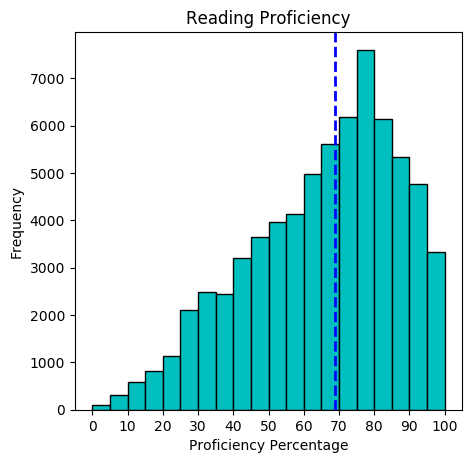

In [22]:
rstats = get_stats(reading_prof)
print_stats(rstats, "Reading")
get_hist(reading_prof, "Reading Proficiency", rstats)

Math Statistics
Mean: 61.46, Standard Deviation: 21.9474
Median: 65.00, 75% Quantile: 78.00, 25% Quantile: 47.00, IQR: 31.00
Mode: 77.00, Max: 99.50, Min: 0.50


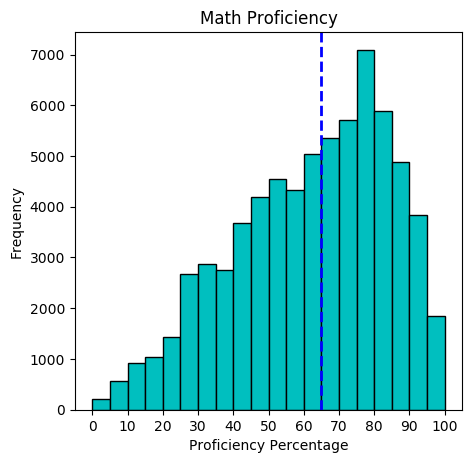

In [23]:
mstats = get_stats(math_prof)
print_stats(mstats, "Math")
get_hist(math_prof, "Math Proficiency", mstats)

Difference Statistics
Mean: 9.61, Standard Deviation: 10.1862
Median: 6.00, 75% Quantile: 13.00, 25% Quantile: 3.00, IQR: 10.00
Mode: 0.00, Max: 95.00, Min: 0.00


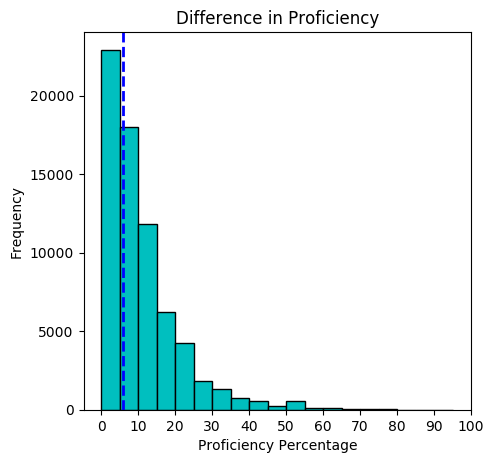

In [24]:
diff = np.abs(reading_prof - math_prof)
diff_stats = get_stats(diff)
print_stats(diff_stats, "Difference")
get_hist(diff, "Difference in Proficiency", diff_stats)

# Data Analysis on Average Proficiency

Average Proficiency Statistics
Mean: 63.18, Standard Deviation: 20.5181
Median: 66.00, 75% Quantile: 79.50, 25% Quantile: 49.50, IQR: 30.00
Mode: 75.00, Max: 99.50, Min: 0.50


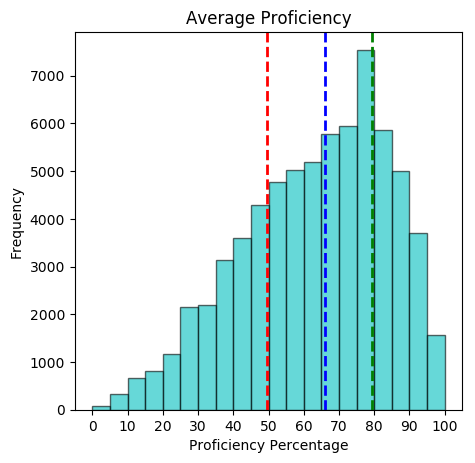

In [25]:
pstats = get_stats(data_final['prof'])
print_stats(pstats, "Average Proficiency")
get_hist(prof, "Average Proficiency", pstats, median=True, q=True, opacity=.6)

# Data Preprocessing

In [26]:
data = data_final.copy()

In [27]:
data_binary = data.copy()

# data['prof_l'] = data['prof'].map(lambda x : -1 if x <= pstats["mean"] - 1.5 * pstats["std"]
#                                 else 0 if x <= pstats["mean"] + 1.5 * pstats["std"] 
#                                 else 1)

data['prof_l'] = data['prof'].map(lambda x : -1 if x <= pstats["q25"]
                                else 0 if x < pstats["q75"] 
                                else 1)

# data_binary['prof'] = data_binary['prof'].map(lambda x : -1 if x <= pstats["mean"] - pstats["std"]
#                                               else 1 if x >= pstats["mean"] + pstats["std"] else 0)

data_binary['prof'] = data_binary['prof'].map(lambda x : -1 if x <= pstats["q25"] else 1 if x >= pstats["q75"] else 0)


data_binary = data_binary[((data_binary['prof'] == 1) | (data_binary['prof'] == -1))]

print(data.shape)
print(data_binary.shape)
# print(data_multi.shape)

# pstats["q75"]

(68850, 445)
(36295, 444)


In [28]:
labels = data_binary['prof']
(values,counts) = np.unique(labels,return_counts=True)
ind=np.argmax(counts)
majority_percent = (sum(labels == values[ind])) / (sum(labels == 1) + sum(labels == -1) + sum(labels == 0))
print("Majority class: %d, Percentage: %.4f" % (values[ind], majority_percent))

for i in values:
    percent = (sum(labels == i)) / (sum(labels == 1) + sum(labels == -1) + sum(labels == 0))
    print("Class: %d, Percentage: %.4f" %(i, percent ))

Majority class: -1, Percentage: 0.5069
Class: -1, Percentage: 0.5069
Class: 1, Percentage: 0.4931


In [29]:
labels = data['prof_l']
(values,counts) = np.unique(labels,return_counts=True)
ind=np.argmax(counts)
majority_percent = (sum(labels == values[ind])) / (sum(labels == 1) + sum(labels == -1) + sum(labels == 0))
print("Majority class: %d, Percentage: %.4f" % (values[ind], majority_percent))

for i in values:
    percent = (sum(labels == i)) / (sum(labels == 1) + sum(labels == -1) + sum(labels == 0))
    print("Class: %d, Percentage: %.4f" %(i, percent ))

Majority class: 0, Percentage: 0.4728
Class: -1, Percentage: 0.2672
Class: 0, Percentage: 0.4728
Class: 1, Percentage: 0.2599


In [30]:
print(data_binary['LSTATE'].unique().shape)
print(data['LSTATE'].unique().shape)

states = data_F['LSTATE'].unique()
bin_states = data_binary['LSTATE'].unique()
multi_states = data['LSTATE'].unique()

print([i for i in all_states if i not in bin_states])
print([i for i in all_states if i not in multi_states])

(50,)
(50,)
['KS']
['KS']


In [31]:
data_binary[data_binary['LSTATE'] == 'MT']

,SURVYEAR,NCESSCH,FIPST,LEAID,SCHNO,STID,SEASCH,LEANM,SCHNAM,PHONE,...,W01,W31,W61,HR1,HE1,HE2,WEIGHT,TOTTCH,avg_teacher_salary,prof
32404,2013,300201000010,30,3002010,10,236,322,ANACONDA ELEM,LINCOLN SCHOOL,4065636361,...,0,291000,2710000,0,0,0,1,49.38,0.0,1
32407,2013,300387000073,30,3003870,73,965,1439,BILLINGS ELEM,MEADOWLARK SCHOOL,4062816213,...,2448000,89076000,14309000,0,0,0,1,677.76,0.0,-1
32408,2013,300387000085,30,3003870,85,965,1270,BILLINGS ELEM,WASHINGTON SCHOOL,4062816221,...,2448000,89076000,14309000,0,0,0,1,677.76,0.0,1
32412,2013,300387000902,30,3003870,902,965,1639,BILLINGS ELEM,EAGLE CLIFFS ELEMENTARY,4062816210,...,2448000,89076000,14309000,0,0,0,1,677.76,0.0,-1
42769,2013,382034000714,38,3820340,714,27014,27411,YELLOWSTONE 14,EAST FAIRVIEW ELEMENTARY SCHOOL,7018445649,...,0,0,443000,0,0,0,1,10.00,43900.0,1


# Visualizing scores

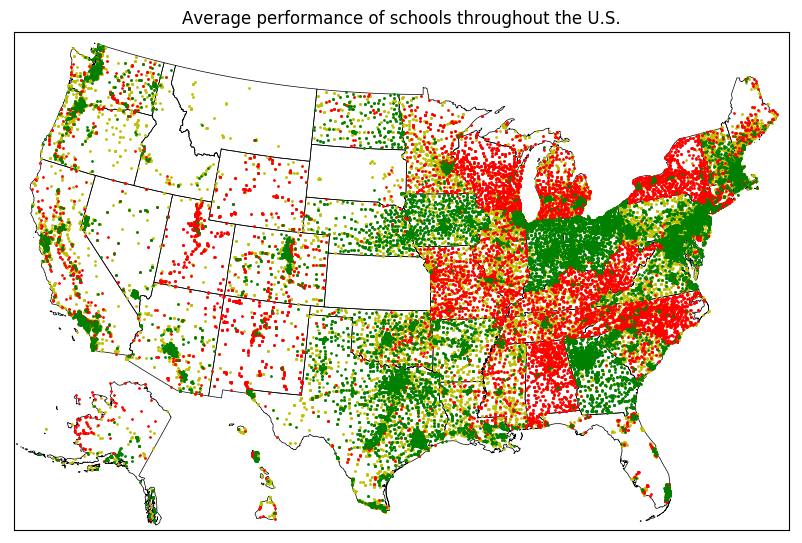

In [32]:
# Lambert Conformal map of lower 48 states.

x = data[['LATCOD', 'LONCOD']].as_matrix()
# y = data['prof'].as_matrix()
y = data['prof_l'].as_matrix()
z = data['LSTATE'].as_matrix()

ATOLL_CUTOFF = 0.005

lat=x[:,0]
lon=x[:,1]

plt.figure(figsize=(10,10), dpi=100)

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

ax = plt.gca() # get current axes instance
for i, shapedict in enumerate(m.states_info):
    # Translate the noncontiguous states:
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg1 = m.states[int(shapedict['SHAPENUM'] - 1)]
        # Only include the 8 main islands of Hawaii so that we don't put dots in the western states.
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > ATOLL_CUTOFF:
            seg = list([(x + 5200000, y-1400000) for (x,y) in seg1])
        # Alaska is large. Rescale it.
        elif shapedict['NAME'] == 'Alaska':
            seg = list([(0.35*x + 800000, 0.35*y-1300000) for (x,y) in seg1])
        poly = Polygon(seg, facecolor='white', edgecolor='black', linewidth=.5)
        ax.add_patch(poly)
# plt.title('Filling State Polygons by Population Density')

xp,yp = m(lon, lat)

xp[z=='AK'] = .35 * xp[z=='AK'] + 800000
yp[z=='AK'] = .35 * yp[z=='AK'] - 1300000
xp[z=='HI'] = xp[z=='HI'] + 5200000
yp[z=='HI'] = yp[z=='HI'] - 1400000

# inner = ((y < pstats["q75"]) & (y > pstats["q25"]))
# upper = (y >= pstats["q75"])
# lower = (y <= pstats["q25"])

inner = y==0
upper = y==1
lower = y==-1

m.plot(xp[inner], yp[inner], 'yo', markersize=1)
m.plot(xp[lower], yp[lower], 'ro', markersize=1)
m.plot(xp[upper], yp[upper], 'go', markersize=1)

plt.title('Average performance of schools throughout the U.S.')

plt.show()

In [33]:
student_num = data['MEMBER'][data['MEMBER'] > 0]
student_stats = get_stats(student_num)
print_stats(student_stats, 'Student')

cmap = plt.cm.hot # use 'hot' colormap
vmin = student_num.min(); vmax = student_num.max() # set range.

student = cmap(1.-np.sqrt((student_num-vmin)/(vmax-vmin)))[:3]

student

Student Statistics
Mean: 572.72, Standard Deviation: 444.9066
Median: 478.00, 75% Quantile: 697.00, 25% Quantile: 308.00, IQR: 389.00
Mode: 342.00, Max: 9013.00, Min: 1.00


array([[ 1.        ,  0.94607785,  0.        ,  1.        ],
       [ 1.        ,  0.89460735,  0.        ,  1.        ],
       [ 1.        ,  1.        ,  0.13529325,  1.        ]])

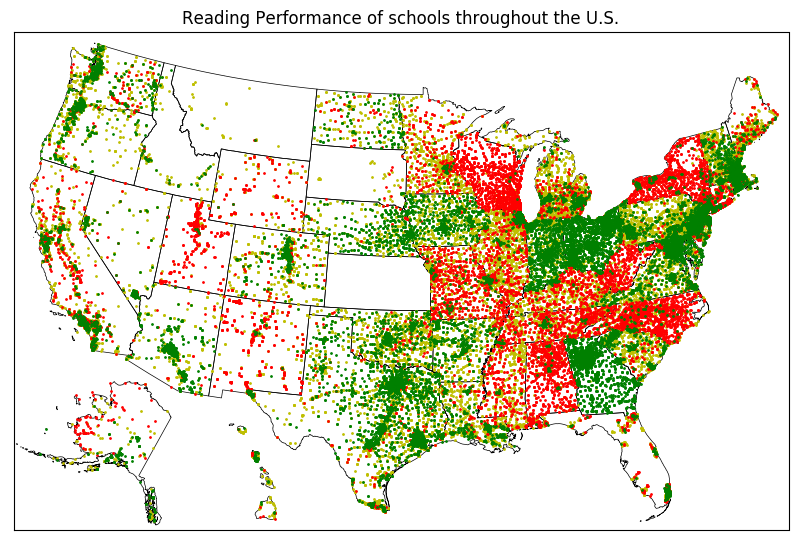

In [34]:
# Lambert Conformal map of lower 48 states.

x = data[['LATCOD', 'LONCOD']].as_matrix()
y = data[prof_names[0]].as_matrix()
z = data['LSTATE'].as_matrix()

ATOLL_CUTOFF = 0.005

lat=x[:,0]
lon=x[:,1]

plt.figure(figsize=(10,10), dpi=100)

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

ax = plt.gca() # get current axes instance
for i, shapedict in enumerate(m.states_info):
    # Translate the noncontiguous states:
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg1 = m.states[int(shapedict['SHAPENUM'] - 1)]
        # Only include the 8 main islands of Hawaii so that we don't put dots in the western states.
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > ATOLL_CUTOFF:
            seg = list([(x + 5200000, y-1400000) for (x,y) in seg1])
        # Alaska is large. Rescale it.
        elif shapedict['NAME'] == 'Alaska':
            seg = list([(0.35*x + 800000, 0.35*y-1300000) for (x,y) in seg1])
        poly = Polygon(seg, facecolor='white', edgecolor='black', linewidth=.5)
        ax.add_patch(poly)
# plt.title('Filling State Polygons by Population Density')

xp,yp = m(lon, lat)

xp[z=='AK'] = .35 * xp[z=='AK'] + 800000
yp[z=='AK'] = .35 * yp[z=='AK'] - 1300000
xp[z=='HI'] = xp[z=='HI'] + 5200000
yp[z=='HI'] = yp[z=='HI'] - 1400000

inner = (y < rstats["q75"]) & (y > rstats["q25"])
upper = (y >= rstats["q75"])
lower = (y <= rstats["q25"])

m.plot(xp[inner], yp[inner], 'yo', markersize=1)
m.plot(xp[lower], yp[lower], 'ro', markersize=1)
m.plot(xp[upper], yp[upper], 'go', markersize=1)


plt.title('Reading Performance of schools throughout the U.S.')

plt.show()

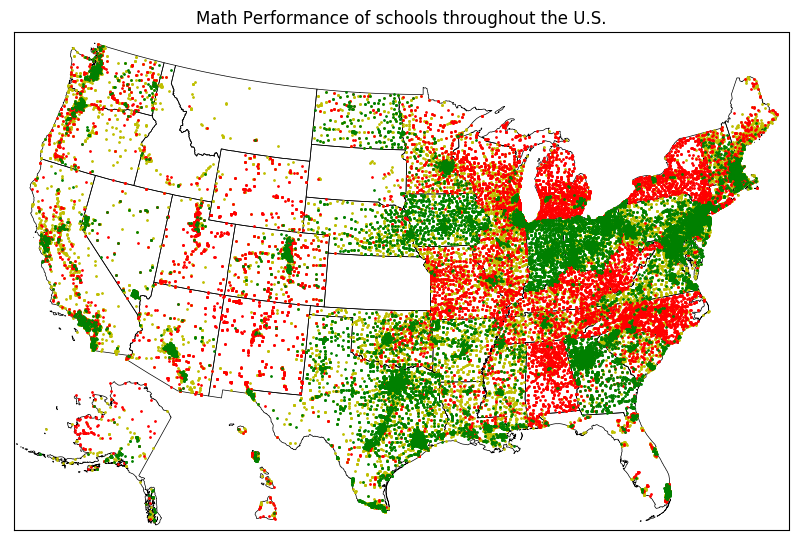

In [35]:
# Lambert Conformal map of lower 48 states.

x = data[['LATCOD', 'LONCOD']].as_matrix()
y = data[prof_names[1]].as_matrix()
z = data['LSTATE'].as_matrix()

ATOLL_CUTOFF = 0.005

lat=x[:,0]
lon=x[:,1]

plt.figure(figsize=(10,10), dpi=100)

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

ax = plt.gca() # get current axes instance
for i, shapedict in enumerate(m.states_info):
    # Translate the noncontiguous states:
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg1 = m.states[int(shapedict['SHAPENUM'] - 1)]
        # Only include the 8 main islands of Hawaii so that we don't put dots in the western states.
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > ATOLL_CUTOFF:
            seg = list([(x + 5200000, y-1400000) for (x,y) in seg1])
        # Alaska is large. Rescale it.
        elif shapedict['NAME'] == 'Alaska':
            seg = list([(0.35*x + 800000, 0.35*y-1300000) for (x,y) in seg1])
        poly = Polygon(seg, facecolor='white', edgecolor='black', linewidth=.5)
        ax.add_patch(poly)
# plt.title('Filling State Polygons by Population Density')

xp,yp = m(lon, lat)

xp[z=='AK'] = .35 * xp[z=='AK'] + 800000
yp[z=='AK'] = .35 * yp[z=='AK'] - 1300000
xp[z=='HI'] = xp[z=='HI'] + 5200000
yp[z=='HI'] = yp[z=='HI'] - 1400000

inner = (y < mstats["q75"]) & (y > mstats["q25"])
upper = (y >= mstats["q75"])
lower = (y <= mstats["q25"])

m.plot(xp[inner], yp[inner], 'yo', markersize=1)
m.plot(xp[lower], yp[lower], 'ro', markersize=1)
m.plot(xp[upper], yp[upper], 'go', markersize=1)

plt.title('Math Performance of schools throughout the U.S.')

plt.show()

In [36]:
data['prof'] = data['prof_l']
data = data.drop(['prof_l'], axis=1)

In [37]:
data = data.drop(prof_names, axis=1)
data_binary = data_binary.drop(prof_names, axis=1)

In [38]:
data_binary.to_csv('data/final_data/data_binary.csv', index=False, encoding='utf-8')
data.to_csv('data/final_data/data.csv', index=False, encoding='utf-8')

# Creating networked data on binary

In [111]:
data_r = pd.read_csv('data/final_data/data_binary.csv')

data_cols = data_r.columns
colsr1 = data_cols[0:20]
# colsr2 = data_cols[3:20]
colsr3 = data_cols[26:29]
data_cols_r1 = colsr1.append(colsr3)

keep = ['FIPST', 'LSTATE']

data_cols_r1 = [i for i in data_cols_r1 if i not in keep]

data_cols_r1

D:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['SURVYEAR',
 'NCESSCH',
 'LEAID',
 'SCHNO',
 'STID',
 'SEASCH',
 'LEANM',
 'SCHNAM',
 'PHONE',
 'MSTREE',
 'MCITY',
 'MSTATE',
 'MZIP',
 'MZIP4',
 'LSTREE',
 'LCITY',
 'LZIP',
 'LZIP4',
 'CONUM',
 'CONAME',
 'CDCODE']

In [120]:
data_n = data_r.drop(data_cols_r1, axis=1)
print(data_n.shape)
data_n = data_n.rename(columns={'FIPST': 'state', 'LSTATE': 'state_name'})
data_n['index'] = data_n.index

(36295, 421)


In [78]:
def distance(lat1, lon1, lat2, lon2):
    R = 3961

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    
    return distance

In [91]:
def create_network(data_n):

#     adjacency = list()
    edge_weights = list()

    for i in range(data_n.shape[0]):
        
        idx = (data_n['state'] == data_n['state'][i]) & (data_n['index'] != i)
        dist = 1/distance(data_n['LATCOD'][idx], data_n['LONCOD'][idx], data_n['LATCOD'][i], data_n['LONCOD'][i])
        
        dist[idx] = (dist[idx] - dist[idx].min())/(dist[idx].max() - dist[idx].min())
        
        adjacency.append(data_n['index'][idx])
        edge_weights.append(np.array(dist))
        
    return adjacency, edge_weights

In [93]:
%%time

if os.path.isfile(data_dir + 'network.pkl'):
    with open(data_dir + 'network.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
        adjacency, edge_weights = pickle.load(f)
else:
    with open(data_dir + 'network.pkl', 'wb') as f:
        adjacency, edge_weights = create_network(data_n)
        pickle.dump([adjacency, edge_weights], f, protocol=-1)

Wall time: 7.3 s


In [122]:
data_nf = data_n.drop(['index'], axis=1)

data_nf.to_csv(data_dir + 'data_n', index=False, encoding='utf-8')